In [1]:
import tensorflow as tf
import numpy as np

In [10]:
def generator():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=4, input_shape=(1,), activation='sigmoid'))
  model.compile(loss = 'binary_crossentropy', optimizer = 'adam')
  return model

In [11]:
generator = generator()
generator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [12]:
def discriminiator():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=4, input_shape = (4,)))
  model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  model.compile(loss = 'binary_crossentropy', optimizer = 'adam')
  return model

In [13]:
discriminiator = discriminiator()
discriminiator.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [14]:
faces = np.array([[1.0,0.0,0.0,1.0],
                  [0.9,0.1,0.2,0.8],
                  [0.9,0.2,0.1,0.8],
                  [0.8,0.1,0.2,0.9],
                  [0.8,0.2,0.1,0.9]])

In [15]:
def GAN(generator, discriminator):
  model = tf.keras.models.Sequential()

  discriminator.trainable = False

  model.add(generator)
  model.add(discriminator)

  model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

  return model

In [16]:
gan = GAN(generator, discriminiator)

In [17]:
from tqdm import tqdm


In [18]:
for i in tqdm(range(1500)):
  noise = tf.random.normal([5, 1]).numpy()
  fake_faces = generator.predict(noise)
  
  real_faces = faces
  batch = np.concatenate((real_faces, fake_faces))
  
  batch_size = len(fake_faces)
  y = np.concatenate((np.ones(batch_size), np.zeros(batch_size)))

  #train the discriminator
  history = discriminiator.train_on_batch(batch, y)

  #train the generator
  gan.train_on_batch(noise, (np.ones(batch_size)))

100%|██████████| 1500/1500 [00:51<00:00, 29.29it/s]


In [19]:
# Drawing function
import matplotlib.pyplot as plt

def view_samples(samples, m, n):
    fig, axes = plt.subplots(figsize=(10, 10), nrows=m, ncols=n, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples):
        ax.xaxis.set_visible(False) #so that not showing numbers in x-axis
        ax.yaxis.set_visible(False) #so that not showing numbers in y-axis
        im = ax.imshow(1-img.reshape((2,2)), cmap='Greys_r')  # 0:black , 1:white
    return fig, axes

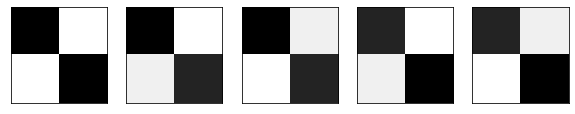

In [20]:
_ = view_samples(faces, 1, 5)

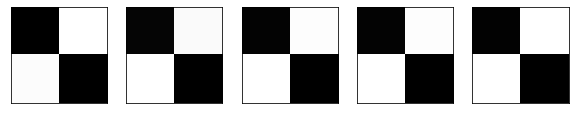

In [21]:
noise = tf.random.normal([5, 1])
gen_faces = generator.predict(noise)
_ = view_samples(gen_faces, 1,5)

In [22]:
discriminiator.predict(faces)

array([[0.8105274 ],
       [0.47292343],
       [0.4783512 ],
       [0.4708952 ],
       [0.47632065]], dtype=float32)

### It's clear that the most of predictions of discriminator tends to be 0.5

In [28]:
noise = tf.random.normal([100, 4])
sorted(discriminiator.predict(np.array(noise).reshape(100,4)), reverse=True)

[array([0.9999347], dtype=float32),
 array([0.9998975], dtype=float32),
 array([0.99978125], dtype=float32),
 array([0.9995605], dtype=float32),
 array([0.99944633], dtype=float32),
 array([0.9985268], dtype=float32),
 array([0.9972528], dtype=float32),
 array([0.9959143], dtype=float32),
 array([0.99497044], dtype=float32),
 array([0.99159104], dtype=float32),
 array([0.98787034], dtype=float32),
 array([0.98449636], dtype=float32),
 array([0.9811264], dtype=float32),
 array([0.96941966], dtype=float32),
 array([0.95746493], dtype=float32),
 array([0.92991066], dtype=float32),
 array([0.90797806], dtype=float32),
 array([0.8881828], dtype=float32),
 array([0.87139124], dtype=float32),
 array([0.86059546], dtype=float32),
 array([0.83028406], dtype=float32),
 array([0.8169904], dtype=float32),
 array([0.8081043], dtype=float32),
 array([0.73674953], dtype=float32),
 array([0.6176886], dtype=float32),
 array([0.57093835], dtype=float32),
 array([0.5320234], dtype=float32),
 array([0.470

### 25% of fake images could decieve the discriminator